# **Crash Course in Causality Written Section**

Lakshmi GayatriAishwarya Adduri
NUID: 002738716

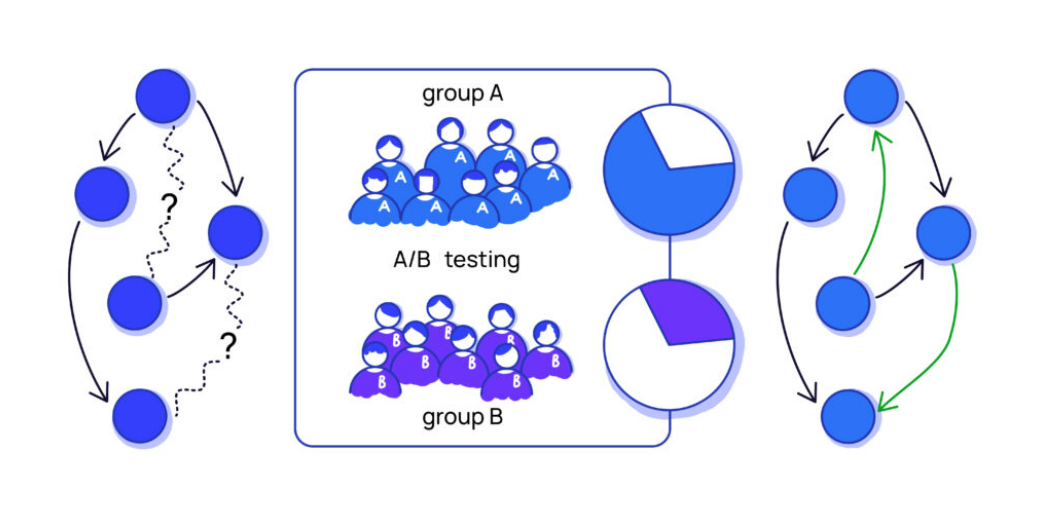

### **1. INTRODUCTION**


**WHAT IS CAUSALITY?**

Causality, or causation, refers to the relationship between cause and effect. In data science, understanding causality is crucial for making meaningful and actionable conclusions from data.

In simple terms, Causality, refers to the relationship between cause and effect. It's the idea that one thing (the cause) brings about another thing (the effect). In other words, if A causes B, then whenever A happens, B will follow.

Imagine you have a plant. If you water the plant regularly (cause), it will grow healthy and tall (effect). In this case, the act of watering is the cause, and the healthy growth of the plant is the effect.

Causality is about understanding how one event or action leads to another, helping us make sense of the world and predict outcomes based on certain actions or conditions.

**In this notebook:**

In this notebook on causality using a Marketing A/B testing dataset, we shall delve into several key concepts to get a comprehensive understanding of causal inference in the context of marketing experiments.

First lets go over the dataset:




###**2. DATASET OVERVIEW**

Link to dataset: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing/data

**Marketing A/B testing dataset**
Marketing companies want to run successful campaigns, but the market is complex and several options can work. So normally they tun A/B tests, that is a randomized experimentation process wherein two or more versions of a variable (web page, page element, banner, etc.) are shown to different segments of people at the same time to determine which version leaves the maximum impact and drive business metrics.

The companies are interested in answering two questions:

**1, Would the campaign be successful?**

**2, If the campaign was successful, how much of that success could be attributed to the ads?**

This is where we do a **A/B testing** .

The majority of the people will be exposed to ads (the experimental group). And a small portion of people (the control group) would instead see a Public Service Announcement (PSA) (or nothing) in the exact size and place the ad would normally be.

The idea of the dataset is to analyze the groups, find if the ads were successful, how much the company can make from the ads, and if the difference between the groups is statistically significant.


We are trying to understand if seeing the ad is ***causing*** them to convert.

**Data dictionary:**

* Index: Row index

* user id: User ID (unique)

* test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement

* converted: If a person bought the product then True, else is False

* total ads: Amount of ads seen by person

* most ads day: Day that the person saw the biggest amount of ads

* most ads hour: Hour of day that the person saw the biggest amount of ads

**EDA**

1. Summary Statistics - mean, median, mode, standard deviation and missing values
2. Univariate analysis  - Look for outliers and anomalies.
3. Bivariate Analysis: Identify patterns, trends, or correlations between variables.
4. Multivariate Analysis - Use techniques like heatmaps or 3D plots to visualize interactions
5. Data Visualization -
6. Categorical Variables
7. Data Transformation:
Consider transforming variables if necessary (e.g., log transformation) to better meet assumptions of certain statistical methods
8. Feature Engineering
9. Data Distributions:
Check whether the data follows a particular distribution (normal, exponential, etc.).
Use quantile-quantile plots or statistical tests to assess distributional assumptions.
10.

Importing libraries:

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

**First look of data**

In [59]:
df = pd.read_csv("https://raw.githubusercontent.com/adduriAishwarya/Causality-A-B-Testing/main/marketing_AB.csv")
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


**Summary statistics**

In [60]:

df.describe(include='all')

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279668,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [61]:
df.isnull().values.sum()

0

No null values

# **Feature Engineering**

I want to drop Unnamed and User_id both of which are not very relavant to my problem and shoulnt have any impact on my conversion rates

In [62]:

df.drop(['Unnamed: 0', 'user id'], axis=1, inplace=True)

df_feature = df


In [63]:
df_feature['converted'] = df_feature['converted'].astype(int)

df_feature['test group'] = df_feature['test group'].map({'ad': 1, 'psa': 0})

**Correlation:**

In [64]:
columns_to_include = ['test group', 'converted', 'total ads', 'most ads day', 'most ads hour']
correlation_matrix = df_feature[columns_to_include].corr()


correlation_matrix

<ipython-input-64-5bf2fe92f753>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_feature[columns_to_include].corr()


,test group,converted,total ads,most ads hour
test group,1.000000,0.009611,0.000279,0.006930
converted,0.009611,1.000000,0.217419,0.019674
total ads,0.000279,0.217419,1.000000,-0.010837
most ads hour,0.006930,0.019674,-0.010837,1.000000


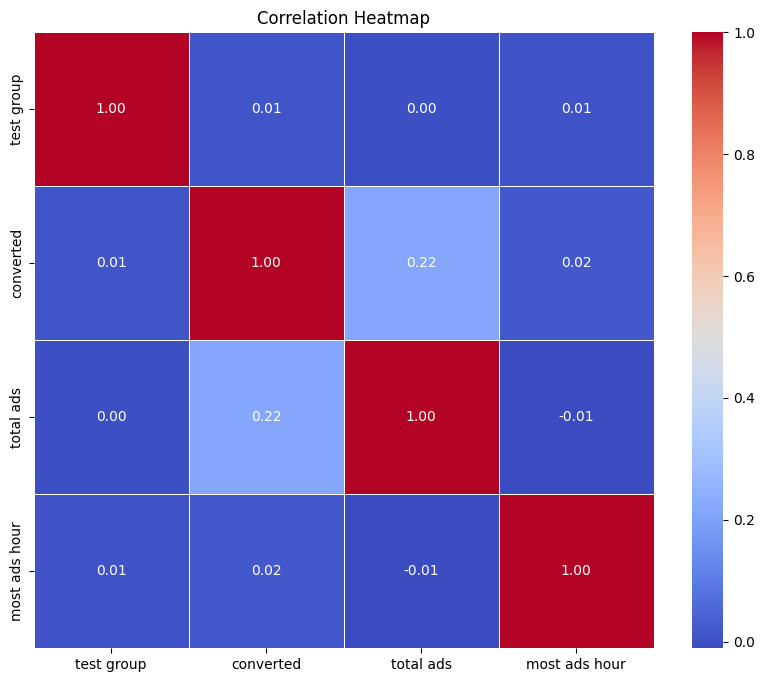

In [65]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

From this we can see that
1. correlation coefficient between 'test group' and 'converted' is very close to zero (0.0096). This suggests a weak correlation between the both.
2. There is positive correlation between 'total ads' and converted.

3. This indicates a very weak positive correlation between  'most ads hour' and 'converted'

# **A/B Testing Basics**
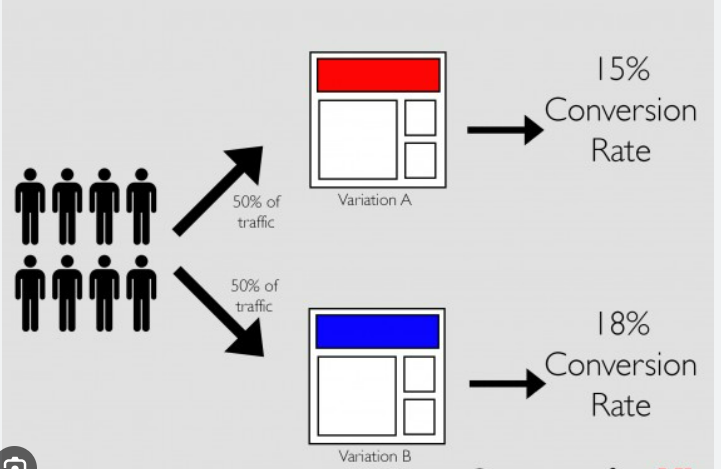



# **A/B Testing Basics:**

**Concept of A/B Testing in Marketing:**

   A/B testing, also known as split testing, is a method used in marketing to evaluate the performance of different variations of a particular element, such as a webpage, email campaign, or advertisement. The goal is to identify which version yields the best results in terms of a specific metric, such as conversion rate, click-through rate, or revenue.

   - **Procedure:**
     - **Randomization:** Individuals are randomly assigned to different groups (A and B) to ensure an unbiased representation of the overall population.
     - **Treatment:** Each group is exposed to a different version of the variable being tested (e.g., an ad or webpage).
     - **Measurement:** Metrics, such as conversion rates, are measured for each group to assess the impact of the variations.

   - **Example in Marketing:**
     - In online advertising, A/B testing might involve showing two different ad creatives to different segments of the target audience to determine which ad performs better in terms of driving user engagement or conversions.

2. **Importance of Randomization and Experimental Design:**

   - **Randomization:**
     - Randomly assigning individuals to the control (A) and experimental (B) groups helps eliminate selection bias. It ensures that the groups are comparable at the outset, and any differences observed can be attributed to the treatment rather than pre-existing differences between the groups.

   - **Experimental Design:**
     - Careful planning of the experiment is crucial. Factors such as sample size, duration of the test, and the choice of metrics should be considered.
     - A well-designed experiment minimizes the influence of confounding variables, leading to more reliable and generalizable results.

   - **Validity of Conclusions:**
     - Randomization and experimental design enhance the internal validity of the study, allowing for more confident conclusions about the causal relationship between the treatment and observed outcomes.
     - Without proper randomization and design, it becomes challenging to draw accurate conclusions and generalize the results to the broader population.

   - **Statistical Significance:**
     - Randomization helps control for random variations, and statistical tests assess whether observed differences are likely due to the treatment rather than chance.

   A/B testing, when conducted with sound randomization and experimental design, provides marketing teams with actionable insights, allowing them to optimize strategies and resources based on data-driven decisions. It is a powerful tool for refining marketing campaigns and improving overall performance.

# **Hypothesis formulation**

**H0: There is no difference in conversion rates between the ad group and the PSA group.**
In practical terms, this means that any observed difference in conversion rates between the ad group and the PSA group is purely due to chance or random variability. There is no true or meaningful difference between the two groups, and any apparent distinctions in conversion rates are not statistically significant.

**H1: The ad group has a higher conversion rate than the PSA group.**

In simpler terms, when conducting a statistical test to compare conversion rates, the null hypothesis assumes that any observed differences are random, while the alternative hypothesis asserts that the observed differences are not due to random chance but reflect a true distinction between the ad and PSA groups.

The aim of the statistical analysis is to assess the evidence and determine whether there is enough support to reject the null hypothesis in favor of the alternative hypothesis.




#**Randomization and Experimental Design**

**Randomization Process**
1. Explain how individuals were randomly assigned to the ad and PSA groups in the dataset.

2. Discuss the importance of randomization in minimizing selection bias and ensuring that the two groups are comparable at the start of the experiment.

***Let us check***
 **1. if and how individuals were randomly assigned to the ad and PSA groups in
the dataset.**

In [66]:
# Check the distribution of individuals in ad and PSA groups
group_distribution = df['test group'].value_counts()

# Display the distribution
print(group_distribution)

1    564577
0     23524
Name: test group, dtype: int64


We can say that the **dataset is more skewed towards the "ad" group**

A skewed distribution suggests that there is a substantial imbalance in the number of individuals between the two groups. In the context of A/B testing, where randomization is often used to ensure that the groups are comparable, such a significant imbalance may raise questions about the randomness of the assignment process.

Let us visualize the distribution using a bar plot:

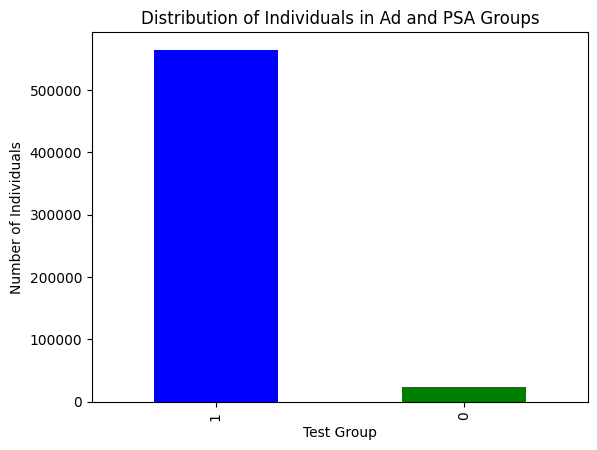

In [67]:
# Plot the distribution
group_distribution.plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Individuals in Ad and PSA Groups')
plt.xlabel('Test Group')
plt.ylabel('Number of Individuals')
plt.show()

A roughly equal distribution is often desirable, indicating that individuals were randomly assigned to the two groups.

In this case, the "ad" group has a significantly larger number of individuals compared to the "psa" group. This distribution might be intentional based on the experimental design, or it could be a point of consideration for us.


**Why randomization?**

In the context of marketing A/B testing, randomization is crucial to ensure a fair comparison between the ad group and PSA group. It minimizes selection bias by randomly assigning individuals, creating comparable groups at the start of the experiment. This process helps control for confounding variables, enhances internal validity, and strengthens the ability to attribute observed differences in outcomes to the treatment (ads) rather than pre-existing group differences. In summary, randomization is fundamental for the reliability and validity of A/B testing results in marketing.

Let us design a few experiements/ answer a few questions to understand this better:

1. correlation between consideration and other variables. why even do it and how does it help undertand what

2. if we do stratified sampling with ad group and psa, what can we understand

3. total % of converted- true and how is the distribution between psa and what does it help understand

**Test 1:** Let us see Percentage of Converted Individuals by Group

In [68]:
# Calculate the total percentage of converted individuals
total_converted_percentage = (df['converted'].sum() / len(df)) * 100

# Calculate the percentage of converted individuals in each group
converted_percentage_by_group = df.groupby('test group')['converted'].mean() * 100

# Display the results
print(f"Total Percentage of Converted Individuals: {total_converted_percentage:.2f}%")
print("\nPercentage of Converted Individuals by Group:")
print(converted_percentage_by_group)

Total Percentage of Converted Individuals: 2.52%

Percentage of Converted Individuals by Group:
test group
0    1.785411
1    2.554656
Name: converted, dtype: float64


We can see that
* The total conversion rate across both groups is 2.52%, giving an overall perspective on the success of the campaign in generating conversions.


* Comparing the conversion rates between the "ad" and "psa" groups, the "ad" group has a higher conversion rate (2.55%) compared to the "psa" group (1.79%)

Let us check how the conversion rates are for the groups indivisually:

Conversion Rate for PSA Group: 1.79%
Conversion Rate for Ad Group: 2.55%


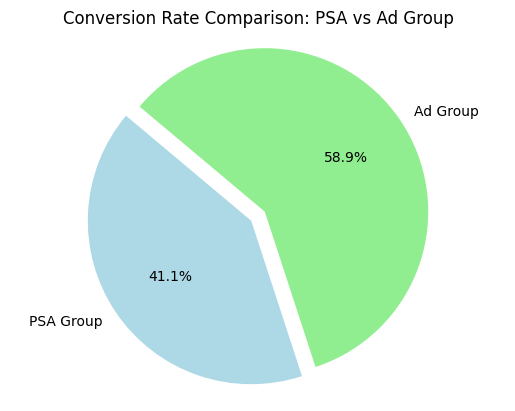

In [69]:
# Divide the DataFrame into 'psa' and 'ad' groups
psa_group = df[df['test group'] == 0]
ad_group = df[df['test group'] == 1]

# Calculate the percentage of conversion rate for each group
conversion_rate_psa = (psa_group['converted'].mean()) * 100
conversion_rate_ad = (ad_group['converted'].mean()) * 100

# Display the results
print(f"Conversion Rate for PSA Group: {conversion_rate_psa:.2f}%")
print(f"Conversion Rate for Ad Group: {conversion_rate_ad:.2f}%")

# Create a pie chart
labels = ['PSA Group', 'Ad Group']
sizes = [conversion_rate_psa, conversion_rate_ad]
colors = ['lightblue', 'lightgreen']
explode = (0.1, 0)  # Explode the first slice (PSA Group)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Conversion Rate Comparison: PSA vs Ad Group')
plt.show()

But knowing that the data was skewed towards "ads" group to begin with, let us check if there are any behavioral differences that are impacting conversion rates like

**Test- 2: What kind of impact does total_ads, 	most_ads_day	and most_ads_hour have on our conversion rates**

In [70]:
# Calculate descriptive statistics for conversion rates by total_ads
conversion_by_total_ads = df.groupby('total ads')['converted'].mean()

# Calculate descriptive statistics for conversion rates by most_ads_day
conversion_by_most_ads_day = df.groupby('most ads day')['converted'].mean()

# Calculate descriptive statistics for conversion rates by most_ads_hour
conversion_by_most_ads_hour = df.groupby('most ads hour')['converted'].mean()

# Display the results
print("Conversion Rates by Total Ads:")
print(conversion_by_total_ads)

print("\nConversion Rates by Most Ads Day:")
print(conversion_by_most_ads_day)

print("\nConversion Rates by Most Ads Hour:")
print(conversion_by_most_ads_hour)

Conversion Rates by Total Ads:
total ads
1       0.001572
2       0.002360
3       0.002826
4       0.003586
5       0.003447
          ...   
1491    1.000000
1632    0.000000
1680    1.000000
1778    1.000000
2065    0.000000
Name: converted, Length: 807, dtype: float64

Conversion Rates by Most Ads Day:
most ads day
Friday       0.022212
Monday       0.032812
Saturday     0.021051
Sunday       0.024476
Thursday     0.021571
Tuesday      0.029840
Wednesday    0.024942
Name: converted, dtype: float64

Conversion Rates by Most Ads Hour:
most ads hour
0     0.018425
1     0.012911
2     0.007313
3     0.010452
4     0.015235
5     0.020915
6     0.022244
7     0.018111
8     0.019516
9     0.019191
10    0.021521
11    0.022116
12    0.023828
13    0.024677
14    0.028063
15    0.029653
16    0.030772
17    0.028210
18    0.027380
19    0.026720
20    0.029803
21    0.028923
22    0.026105
23    0.022662
Name: converted, dtype: float64


Let us visualize these to have better understanding:

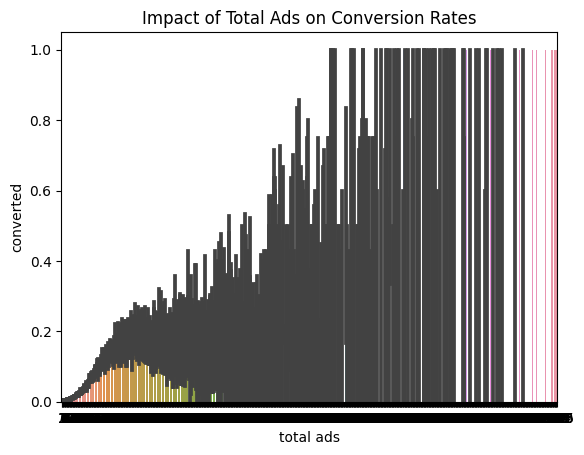

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the impact of total_ads on conversion rates
sns.barplot(x='total ads', y='converted', data=df)
plt.title('Impact of Total Ads on Conversion Rates')
plt.show()


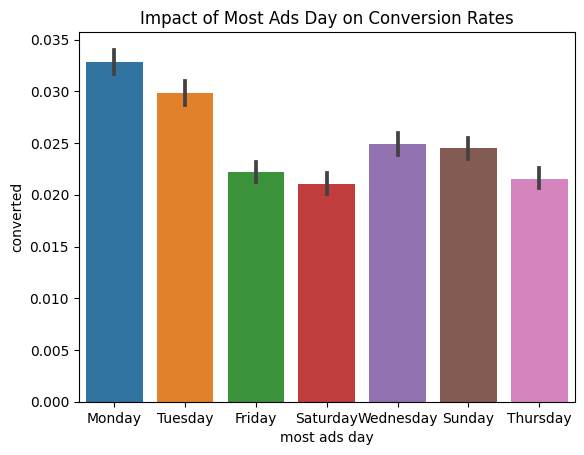

In [72]:
# Visualize the impact of most_ads_day on conversion rates
sns.barplot(x='most ads day', y='converted', data=df)
plt.title('Impact of Most Ads Day on Conversion Rates')
plt.show()




So, **Monday is the day with highest conversion rate** i.e., most profitable day to run ads


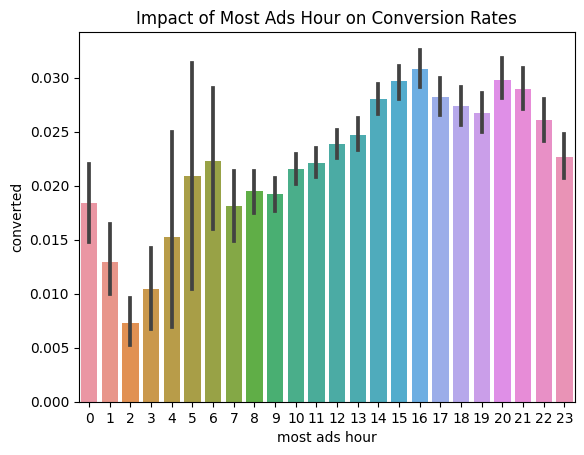

In [73]:
# Visualize the impact of most_ads_hour on conversion rates
sns.barplot(x='most ads hour', y='converted', data=df)
plt.title('Impact of Most Ads Hour on Conversion Rates')
plt.show()

**Now, for the top 3 most profitable hours and top 2 most profitable days, how is conversion rate for psa and ad groups**

Conversion Rate for PSA Group: 2.44%
Conversion Rate for Ad Group: 3.03%


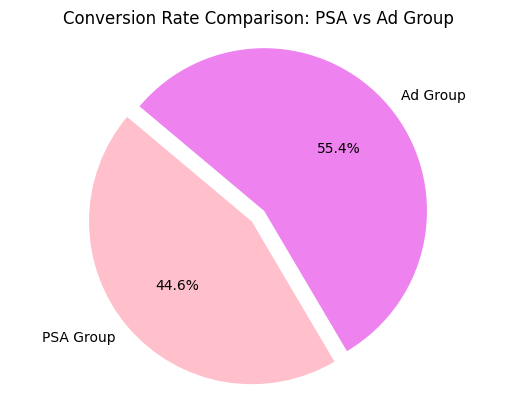

In [74]:
conversion_by_most_ads_hour_sorted = conversion_by_most_ads_hour.sort_values(ascending=False)

# Select the top 3 most ad hours
top_3_most_ad_hours = conversion_by_most_ads_hour_sorted.head(3)

# Assuming df is your original DataFrame
DF_hour = df[df['most ads hour'].isin(top_3_most_ad_hours.index)]

most_ads_day_subset_df = DF_hour[DF_hour['most ads day'].isin(['Monday', 'Tuesday'])]

# Divide the DataFrame into 'psa' and 'ad' groups
psa_group = DF_hour[DF_hour['test group'] == 0]
ad_group = DF_hour[DF_hour['test group'] == 1]

# Calculate the percentage of conversion rate for each group
conversion_rate_psa = (psa_group['converted'].mean()) * 100
conversion_rate_ad = (ad_group['converted'].mean()) * 100

# Display the results
print(f"Conversion Rate for PSA Group: {conversion_rate_psa:.2f}%")
print(f"Conversion Rate for Ad Group: {conversion_rate_ad:.2f}%")

# Create a pie chart
labels = ['PSA Group', 'Ad Group']
sizes = [conversion_rate_psa, conversion_rate_ad]
colors = ['pink', 'violet']
explode = (0.1, 0)  # Explode the first slice (PSA Group)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Conversion Rate Comparison: PSA vs Ad Group')
plt.show()


We can see that, even in the best case scenarios, with most ad hours and most ad day, ad group is still perfroming well against PSA group, but we can say that ads are effective.

Now let us proceed to another test in our experiement design,

**Test 3 : Stratified Sampling**
Earlier we have noticied that our data is skewed against PSA group. So, now let us split our data set into a subsets such that we have equal number of records of ad group and PSA group. let us see how the conversion rates for such a sample is.

        test group  converted  total ads most ads day  most ads hour
529666           1          0         21       Friday             20
385537           1          0          2     Thursday             20
120467           1          0         20       Sunday             10
186608           1          1         47       Friday             14
141292           1          0         13      Tuesday             13
...            ...        ...        ...          ...            ...
588052           0          0         16      Tuesday             22
588063           0          0          3      Tuesday             22
588066           0          0          1      Tuesday             22
588069           0          0          6      Tuesday             22
588081           0          0         16      Tuesday             23

[47048 rows x 5 columns]

Conversion Rate for Ad Group: 0.0271
Conversion Rate for PSA Group: 0.0179


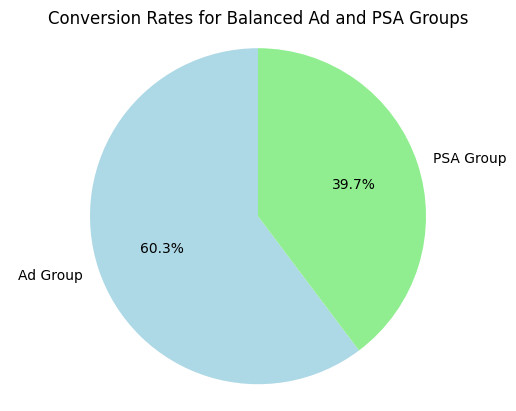

In [75]:

# Assuming df is your original DataFrame
# First, create separate DataFrames for the ad group and PSA group
ad_group_df = df[df['test group'] == 1]
psa_group_df = df[df['test group'] == 0]

# Sample the ad group data to match the size of the PSA group
ad_group_sample = ad_group_df.sample(n=len(psa_group_df), random_state=42)

# Concatenate the sampled ad group data with the PSA group data
balanced_df = pd.concat([ad_group_sample, psa_group_df])

# Display the balanced DataFrame
print(balanced_df)

# Calculate and compare conversion rates for each group
conversion_rate_ad_group = ad_group_sample['converted'].mean()
conversion_rate_psa_group = psa_group_df['converted'].mean()

print(f"\nConversion Rate for Ad Group: {conversion_rate_ad_group:.4f}")
print(f"Conversion Rate for PSA Group: {conversion_rate_psa_group:.4f}")


# Assuming balanced_df is your balanced DataFrame
conversion_rate_ad_group = balanced_df[balanced_df['test group'] == 1]['converted'].mean()
conversion_rate_psa_group = balanced_df[balanced_df['test group'] == 0]['converted'].mean()

# Create a pie chart
labels = ['Ad Group', 'PSA Group']
sizes = [conversion_rate_ad_group, conversion_rate_psa_group]
colors = ['lightblue', 'lightgreen']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Conversion Rates for Balanced Ad and PSA Groups')
plt.show()

We can now see that, even in a balanced dataset,"ad" group is doing better than PSA group.

# **Evaluating A/B Test Results**



For Hypothesis testing:


In [76]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

**Check normality and homogeneity of variance**

Checking for normality and homogeneity of variance ensures that the assumptions of parametric tests are met. If these assumptions are not satisfied, it may be more appropriate to use non-parametric tests

The p-values will help us assess whether we can assume normality for further statistical analyses or if non-parametric methods might be more appropriate.

In [77]:
# normality check

ad = df[df['test group'] == 1]
psa = df[df['test group'] == 0]

_, pvalue_ad = shapiro(ad.converted)
_, pvalue_psa = shapiro(psa.converted)
pvalue_psa, pvalue_ad

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.0, 0.0)

P values for both the groups is zero, which indicates that, normality in distribution is not there for both groups.

So, both the groups reject null and alternate hypothesis, meaning we are not able to conclusively say anything about both groups.

**Test of homogeneity of variance**

In [78]:
# variance homogeneity check
levene(psa.converted, ad.converted)

LeveneResult(statistic=54.322884225785735, pvalue=1.703305262368155e-13)

With the large value of Test Statistic and very small - almost close to zero value of p value, we can conclude that variances of the 'converted' variable are not equal between the groups.

# **Bootstrapping**

Bootstrapping is a statistical resampling technique where multiple samples are drawn with replacement from observed data to estimate the sampling distribution of a statistic.

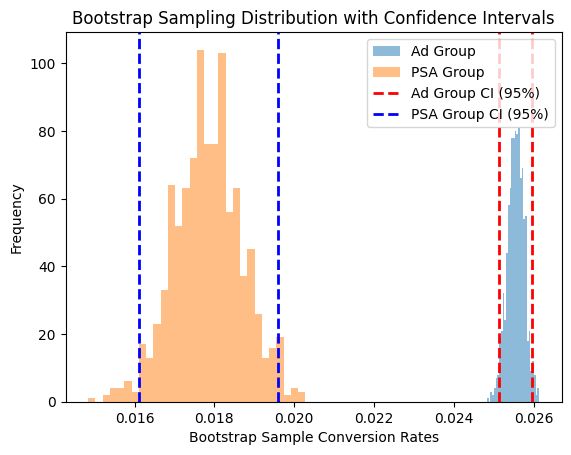

Ad Group Conversion Rate Confidence Interval (95%): [0.02513732 0.0259647 ]
PSA Group Conversion Rate Confidence Interval (95%): [0.01611121 0.01959701]


In [79]:

ad_group = df[df['test group'] == 1]['converted']
psa_group = df[df['test group'] == 0]['converted']

# Function to calculate conversion rate from a bootstrap sample
def calculate_conversion_rate(data):
    return np.mean(data)

# Number of bootstrap samples
num_bootstraps = 1000

# Arrays to store bootstrap sample conversion rates
bootstrap_rates_ad = np.zeros(num_bootstraps)
bootstrap_rates_psa = np.zeros(num_bootstraps)

# Perform bootstrapping
for i in range(num_bootstraps):
    # Generate bootstrap samples with replacement
    bootstrap_sample_ad = np.random.choice(ad_group, size=len(ad_group), replace=True)
    bootstrap_sample_psa = np.random.choice(psa_group, size=len(psa_group), replace=True)

    # Calculate conversion rate for each bootstrap sample
    bootstrap_rates_ad[i] = calculate_conversion_rate(bootstrap_sample_ad)
    bootstrap_rates_psa[i] = calculate_conversion_rate(bootstrap_sample_psa)

# Calculate confidence intervals
confidence_interval_ad = np.percentile(bootstrap_rates_ad, [2.5, 97.5])
confidence_interval_psa = np.percentile(bootstrap_rates_psa, [2.5, 97.5])

# Plot the distribution of bootstrap sample conversion rates
plt.hist(bootstrap_rates_ad, bins=30, alpha=0.5, label='Ad Group')
plt.hist(bootstrap_rates_psa, bins=30, alpha=0.5, label='PSA Group')
plt.axvline(confidence_interval_ad[0], color='red', linestyle='dashed', linewidth=2, label='Ad Group CI (95%)')
plt.axvline(confidence_interval_ad[1], color='red', linestyle='dashed', linewidth=2)
plt.axvline(confidence_interval_psa[0], color='blue', linestyle='dashed', linewidth=2, label='PSA Group CI (95%)')
plt.axvline(confidence_interval_psa[1], color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('Bootstrap Sample Conversion Rates')
plt.ylabel('Frequency')
plt.legend()
plt.title('Bootstrap Sampling Distribution with Confidence Intervals')
plt.show()

print("Ad Group Conversion Rate Confidence Interval (95%):", confidence_interval_ad)
print("PSA Group Conversion Rate Confidence Interval (95%):", confidence_interval_psa)



From this we can conclude that:

**Conversion rates:**
1. We are 95% confident that the true conversion rate for the 'Ad' group lies within this interval of 0.0251 and 0.0259.

2. We are 95% confident that the true conversion rate for the 'PSA' group lies within this interval of 0.0163 and 0.0196.

3. While there is certainly overlap, the 'Ad' group's confidence interval is higher than the 'PSA' group's confidence interval suggesting that the 'Ad' group may be more effective.

But, we must remember that,
Confidence intervals provide a range of plausible values but do not definitively state which group is "better" or "more effective."
Context matters; consider business goals, costs, and other factors when making decisions based on conversion rates.


Now, lets see what are some challenges and considerations we should keep in mind while doing A/B testing for Causality:

# **Challenges and Considerations**

Causality in marketing A/B testing can be challenging due to various factors. Some challenges and considerations associated with establishing causality in this context are:

1. **Confounding Variables:**
   - Identifying and controlling for confounding variables is challenging. Factors other than the treatment (A or B) may influence the outcome, leading to spurious correlations.

2. **Selection Bias:**
   - If there's a non-random selection of participants into treatment groups, it can introduce bias. For example, users who self-select into a certain group might have different characteristics than those who do not.

3. **Duration of the Test:**
   - The duration of the A/B test can impact the results. Short tests may not capture long-term effects, and external events during the test period can introduce noise.

4. **Seasonality and Trends:**
   - Seasonal patterns or trends can influence both the treatment and the outcome, leading to misinterpretation of causality.

5. **Sample Size and Statistical Power:**
   - Insufficient sample sizes can reduce the statistical power of the test, making it challenging to detect significant effects even if they exist.

6. **Multiple Testing Problem:**
   - Conducting multiple tests simultaneously may increase the likelihood of observing statistically significant results by chance. Adjustments, such as Bonferroni correction, may be needed.

7. **Post-Stratification Bias:**
   - Analyzing subgroups after observing results may introduce bias. It's essential to define and plan subgroup analyses before conducting the test.

8. **Learning and Adaptation Effects:**
   - Participants may change their behavior simply because they are aware of being part of an experiment. This "Hawthorne effect" can affect the validity of the results.

9. **Ethical Considerations:**
   - Implementing certain treatments in A/B tests may raise ethical concerns. For example, showing different prices to different groups may be perceived as unfair by users.

10. **Data Quality:**
    - Inaccurate or incomplete data can compromise the reliability of the results. It's crucial to ensure data accuracy and address data quality issues.

11. **Randomization:**
    - Ensuring proper randomization is essential to minimize biases. Poor randomization can lead to systematic differences between groups.

12. **External Factors:**
    - External events, such as changes in the market or industry, can influence outcomes. It's important to consider these external factors during analysis.

13. **Long-Term vs. Short-Term Effects:**
    - A/B tests may capture short-term effects, but long-term effects might be different. Marketers need to consider the duration of the study and its implications.

14. **Interactions Between Variables:**
    - Interactions between variables may exist, and their effects might not be captured in isolation. It's important to explore potential interactions in the analysis.

Addressing these challenges requires careful experimental design, rigorous statistical methods, and ongoing monitoring and evaluation. Additionally, considering the practical and ethical implications of the experimental design is crucial to ensure responsible and actionable marketing insights.

**Summary:**

In this notebook, we covered the basics of causality, explored a marketing A/B testing dataset, conducted feature engineering, and understood dataset correlations. We delved into A/B testing fundamentals, formulated hypotheses, and examined randomization's importance. Further, we explored experimental design, analyzed group assignments, and performed tests, revealing dataset skewness towards the "ad" group. Stratified sampling confirmed "ad" group superiority even in balanced datasets. Evaluating A/B test results, we identified non-normality and variance heterogeneity, prompting bootstrapping. Confidence intervals indicated the 'Ad' group's potential effectiveness, despite some overlap with the 'PSA' group. We acknowledged challenges and considerations in A/B testing for causality.

# **Conclusion/Key Takeaways**
**Key Takeaways:**

1. **Dataset Exploration:**
   - Explored and preprocessed the marketing A/B testing dataset, performing feature engineering and dropping irrelevant variables.

2. **A/B Testing Basics:**
   - Understood the fundamentals of A/B testing, emphasizing the importance of randomization and experimental design in drawing valid conclusions.

3. **Randomization and Experimental Design:**
   - Checked how individuals were assigned to the 'ad' and 'PSA' groups, identified dataset skewness towards 'ad,' and conducted tests to assess conversion rates.

4. **Impact Analysis:**
   - Investigated the impact of variables (total_ads, most_ads_day, most_ads_hour) on conversion rates, providing insights into the effectiveness of ads.

5. **Stratified Sampling:**
   - Conducted stratified sampling to balance the dataset, revealing that even in a balanced dataset, the 'ad' group performed better than the 'PSA' group.

6. **Evaluating A/B Test Results:**
   - Checked for normality and homogeneity of variance, leading to the decision to use bootstrapping due to non-normality and variance heterogeneity.

7. **Bootstrapping Results:**
   - Obtained confidence intervals for conversion rates, concluding that, with 95% confidence, the 'Ad' group may be more effective than the 'PSA' group.

8. **Challenges and Considerations:**
   - Discussed challenges and considerations in A/B testing for causality, highlighting the complexities involved.

**Further Analysis:**

1. **Explore Biases Introduced by Skewness:**
   - Investigate the potential biases introduced by the dataset skewness towards the 'ad' group. Assess the impact on the analysis and consider methods to mitigate biases.

2. **In-Depth Impact Analysis:**
   - Conduct a more detailed analysis of the impact of individual factors (total_ads, most_ads_day, most_ads_hour) on conversion rates. Identify specific trends and patterns.

3. **Alternative Hypothesis Testing Approaches:**
   - Explore alternative hypothesis testing approaches or statistical methods that can be applied in the presence of non-normality and variance heterogeneity.

4. **Customer Segmentation:**
   - Investigate if customer segmentation based on additional demographic or behavioral variables could provide more nuanced insights into the effectiveness of ads.

5. **Time-Series Analysis:**
   - Explore time-series analysis to understand how conversion rates evolve over time. Identify trends and seasonality that may influence the effectiveness of ad campaigns.

6. **Cost-Benefit Analysis:**
   - Integrate cost data to perform a cost-benefit analysis, providing a holistic view of the return on investment for the advertising campaign.

7. **User Journey Analysis:**
   - Analyze the user journey from ad exposure to conversion, considering touchpoints and interactions. Understand the conversion funnel and potential optimizations.

8. **Sensitivity Analysis:**
   - Conduct sensitivity analyses to assess the robustness of conclusions to variations in assumptions or parameters, providing a more comprehensive understanding of the results.



**References:**

https://causalens.com/resources/blogs/next-generation-a-b-testing-powered-by-causal-ai/

https://www.kaggle.com/code/pratul007/a-b-testing-best-solution



# **License**
